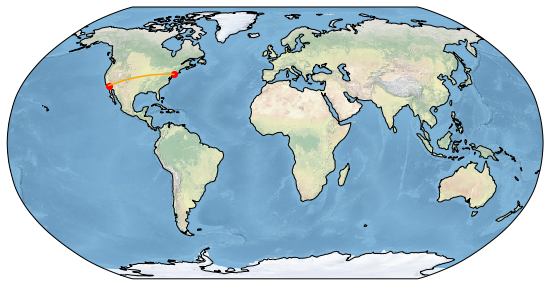

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.stock_img()
ax.coastlines()
#40.7128° N, 74.0060° W
#34.0522° N, 118.2437° W
ax.plot(360 -74.0060, 40.7128, 'o', color='R', transform=ccrs.PlateCarree())
ax.plot(360 -118.2437,34.0522 , 'o', color='R', transform=ccrs.PlateCarree())
ax.plot([ 360-118.2437, 360-74.0060], [34.0522, 40.7128], 
        transform=ccrs.Geodetic(), color='orange')
plt.show()

In [2]:
import cartopy.io.shapereader as shpreader

# can also be a shape file
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

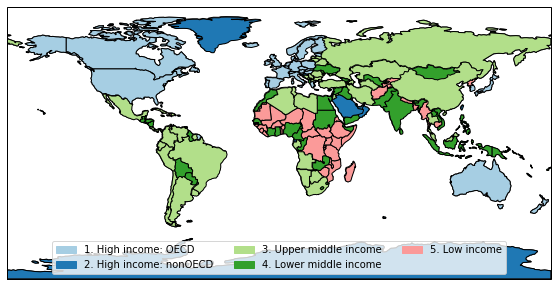

In [3]:
import matplotlib.cm as mcm
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.coastlines()
#40.7128° N, 74.0060° W
#34.0522° N, 118.2437° W
key = dict()
for cgeo, crec in zip(reader.geometries(), reader.records()):
    llab = crec.attributes['INCOME_GRP']
    inc_code = int(llab.split('.')[0])
    fc = mcm.Paired(inc_code-1)
    key[llab] = mpatches.Patch(color=fc, label=inc_code)
    ax.add_geometries([cgeo], ccrs.PlateCarree(), edgecolor='k', facecolor=fc)

patches, labels = zip(*[(key[lab], lab) for lab in sorted(key.keys())])

ax.legend(patches, labels, ncol=3, loc="lower center")
plt.show()

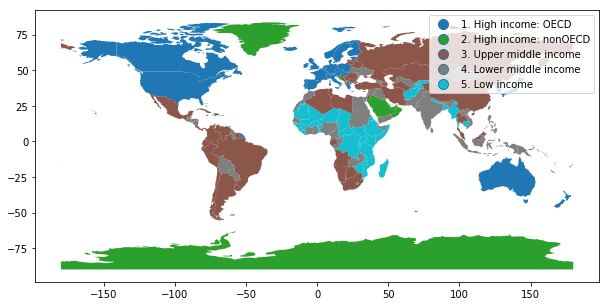

In [5]:
import geopandas as gpd
gdf = gpd.read_file(shpfilename)
fig, ax = plt.subplots(figsize=(20,5))
_ = gdf.plot(column='INCOME_GRP', ax=ax, legend=True)

# More Stats? https://pysal.readthedocs.io/en/latest/

# How to plot raster data?

In [6]:
import xarray as xr
ds = xr.tutorial.load_dataset('air_temperature')

/home/hannah/miniconda3/envs/viztalk/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: load_dataset` will be removed in xarray version 0.12. The current behavior of this function can be achived by using `tutorial.open_dataset(...).load()`.
  


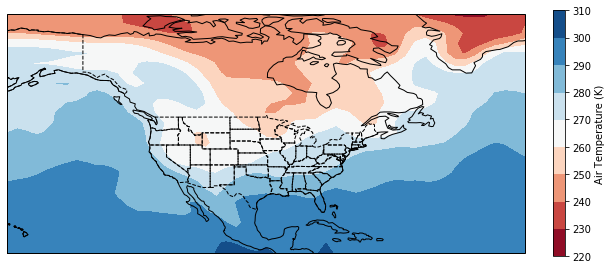

In [7]:
# cartopy is being used here, but somewhat silently
import cartopy.feature as cfeature
fig, ax = plt.subplots(figsize=(10, 5), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.contourf(ds['lon'].values, ds['lat'].values, ds['air'][0].values, 
               transform=ccrs.PlateCarree(), cmap='RdBu')

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
cb = fig.colorbar(im, ax=ax, fraction=.022)
cb.set_label("Air Temperature (K)")
plt.show()


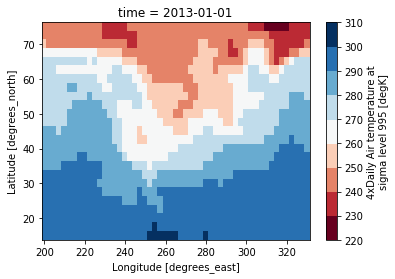

In [8]:
# Using directly
ds['air'][0].plot(cmap = 'RdBu', levels=9)

# Mix & Match 'cause it's all built on top of Matplotlib

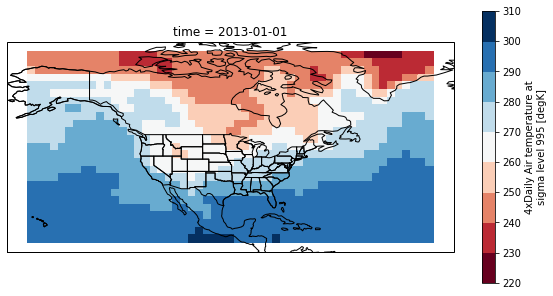

In [9]:
import cartopy.feature as cfeature
fig, ax = plt.subplots(figsize=(10, 5), 
                       subplot_kw={'projection': ccrs.PlateCarree()})

ds['air'][0].plot(cmap = 'RdBu', levels=9, ax=ax)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

plt.show()

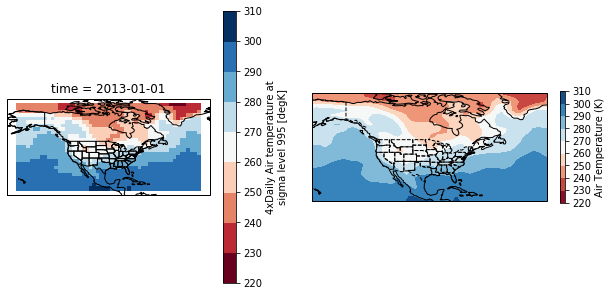

In [10]:
import cartopy.feature as cfeature
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2,
                               subplot_kw={'projection': ccrs.PlateCarree()})

ds['air'][0].plot(cmap = 'RdBu', levels=9, ax=ax1)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.STATES)

im = ax2.contourf(ds['lon'].values, ds['lat'].values, ds['air'][0].values, 
               transform=ccrs.PlateCarree(), cmap='RdBu')

ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.STATES, linestyle='--')
cb = fig.colorbar(im, ax=ax2, fraction=.022)
cb.set_label("Air Temperature (K)")

plt.show()